# 00_EDA

## Problem statement

This test consists in creatinga a Machine Learning model able to predict the probability of survival of passengers in a shipwreck.

This test is based on the famous Kaggle competition about the Titanic Disaster. 

https://www.kaggle.com/c/titanic

## Import libraries

In [1]:
# Linear algebra
import numpy as np 

# Data processing
import pandas as pd 

# Regex
import re

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 6
plt.style.use('tableau-colorblind10')

# Warnings
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
df = pd.read_csv('input/phpMYEkMl.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [3]:
print(f'The dataset has {df.shape[0]} examples and {df.shape[1]-1} features + the target variable (survived)')

The dataset has 1309 examples and 13 features + the target variable (survived)


We define the target of our problem.

In [4]:
# Define target column
target = df['survived']

In [5]:
print(f'We suppose that the survived column is well filled, with:\n'
      '- ' + str(df['survived'].unique()[0]) + ': survived\n'
      '- ' + str(df['survived'].unique()[1]) + ': NOT survived')

We suppose that the survived column is well filled, with:
- 1: survived
- 0: NOT survived


We reorder columns, moving the target column at the end of the dataframe.

In [6]:
df = df.drop(columns = ['survived'])
df.insert(loc = df.shape[1], column = 'survived', value = target)
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?,0
1305,3,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?,0
1307,3,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?,0


In [7]:
print(f'The dataset has {df.shape[0]} examples and {df.shape[1]-1} features + the target variable (survived)')

The dataset has 1309 examples and 13 features + the target variable (survived)


## Data Exploration

### Features

In [8]:
col = df.columns
col

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest', 'survived'],
      dtype='object')

- *pclass*: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower
    
    
- *name*
- *sex*
- *age*: Age in years


- *sibsp*: the total number of the passengers' siblings and spouse.

    
- *parch*: the total number of the passengers' parents and children.


- *ticket*: Ticket number


- *fare*: Passenger fare 


- *cabin*: Cabin number  


- *embarked*: Port of Embarkation 
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton
    
- *body*: Body number (if did not survive and body was recovered)


- *boat*: Lifeboat (if survived)


- *home.est*


- *survived*: target column

    - 1 = Survived
    - 0 = Not Survived

Four of the features are integers, the others are objects.

In [9]:
print(df.dtypes)

pclass        int64
name         object
sex          object
age          object
sibsp         int64
parch         int64
ticket       object
fare         object
cabin        object
embarked     object
boat         object
body         object
home.dest    object
survived      int64
dtype: object


From the table and data types above, we can note that we need to convert age and fare columns into numeric ones later on, so that the machine learning algorithms can process them. 

In [10]:
col = ['age', 'fare']

df[col] = df[col].apply(pd.to_numeric, errors='coerce')
print(df.dtypes)

pclass         int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body          object
home.dest     object
survived       int64
dtype: object


## Statistics

Statistical info about numerical variables:

In [11]:
df.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


### Outliers

We check and visualize outliers of numerical features with boxplots.

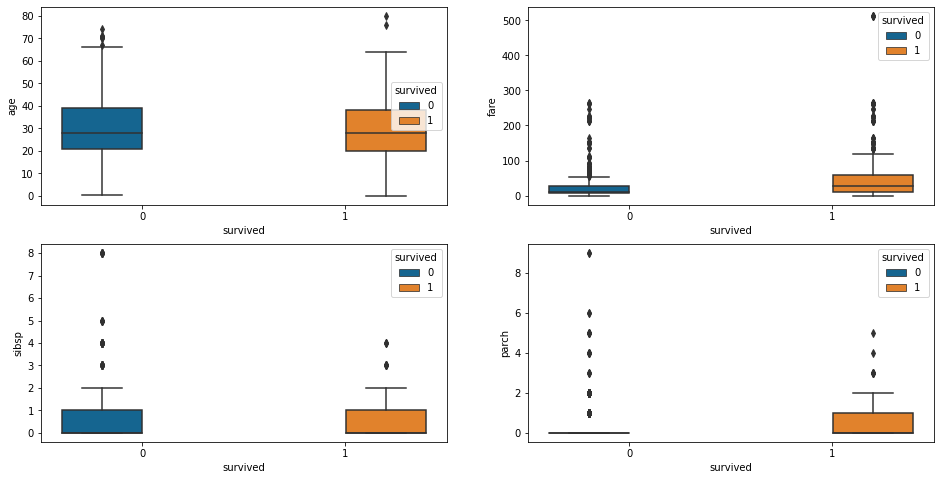

In [12]:
fig,ax = plt.subplots(2, 2, figsize=(16, 8))

sns.boxplot(y='age', x = 'survived', hue = 'survived', data = df , ax=ax[0][0])
sns.boxplot(y='fare',x = 'survived', hue = 'survived', data = df, ax=ax[0][1])
sns.boxplot(y='sibsp', x = 'survived', hue = 'survived', data = df, ax=ax[1][0])
sns.boxplot(y='parch', x = 'survived', hue = 'survived', data = df, ax=ax[1][1]);

The feature with more outliers are related with family size (sibsp + parch). We will crete a new column adding these two values and crating a new column (family size).

Fare and age haven't got too much outliers. We think discrtize this columns could be a good idea.

## Data pre-processing

In [13]:
# Create a copy of the dataframe
df_eda = df.copy()
df_eda.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",0


## Drop columns

First, we drop the columns we think don't give us valuable information for the problem.

### body, boat

'body'/'boat' give us information about the passenger survival probability > we decide to use the column 'survived' to get this information

### home.dest

'home.dest' column is not relevant for our analysis... we can drop it!

We can notice that thes two people survived... we do not need to do further analysis and we can drop the entire column! 

In [14]:
df_eda = df_eda.drop(columns = ['body', 'boat', 'home.dest'])
df_eda.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [15]:
print(f'The dataset has {df_eda.shape[0]} examples and {df_eda.shape[1]-1} features + the target variable (survived)')

The dataset has 1309 examples and 10 features + the target variable (survived)


## Missing data

Check out for missing data.

In [16]:
missing_values = df_eda.isnull().sum().sort_values(ascending=False)
missing_values

age         263
fare          1
pclass        0
name          0
sex           0
sibsp         0
parch         0
ticket        0
cabin         0
embarked      0
survived      0
dtype: int64

The only two columns with missing data are age and fare.

In [17]:
perc_missing_values = round(df_eda.isnull().sum()*100/df_eda.shape[0],2).sort_values(ascending=False)
# perc_missing_values

In [18]:
missing_data = pd.concat([missing_values, perc_missing_values], axis=1, keys=['Total', '%'])
missing_data.head(2)

,Total,%
age,263,20.09
fare,1,0.08


### age

20% of the age column is missing. Let's have a look at the distribution and replace missing values.

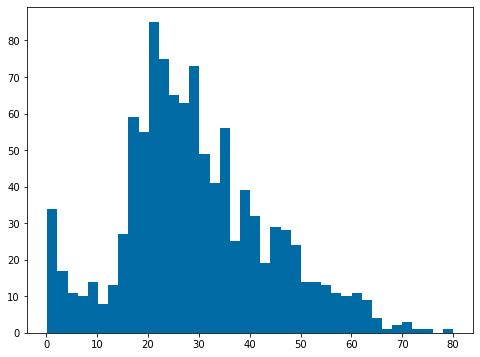

In [19]:
# Histogram with null values
plt.hist(df_eda.age, bins = 40);

We have a right-skewed distribution for age and the median should be a good choice for filling missing values. We check how much the median of age differs for passengers classes.

In [20]:
print('Median for Age separeted by pclass and sex:')
median_age = df_eda.groupby(['pclass', 'sex'])['age'].median()
median_age

Median for Age separeted by pclass and sex:


pclass  sex   
1       female    36.0
        male      42.0
2       female    28.0
        male      29.5
3       female    22.0
        male      25.0
Name: age, dtype: float64

As we can see, younger people (both men and women) embarked in 3rd class and oldest people in 1st class.  Men and women ages differs too.

We fill the missing values with random values centered around the mean and distributed with standard deviation, grouping ages by pclass and sex.

In [21]:
# df_eda.age = df.groupby(['pclass', 'sex'])['age'].apply(lambda x: x.fillna(x.median()))

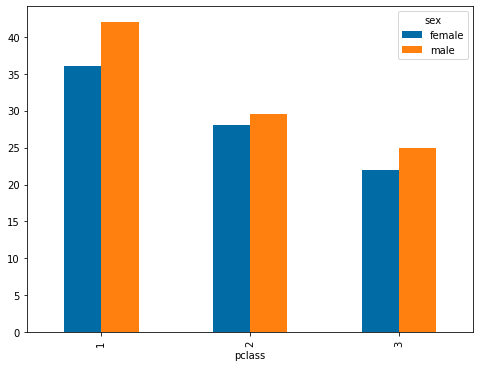

In [22]:
df_eda.groupby(['pclass', 'sex'])['age'].median().unstack().plot(kind = 'bar');

In [23]:
# Group ages by class and sex
ga = ['pclass', 'sex']

In [24]:
def fill_na_age(df, col, gb = ga):
    '''
    Function that replaced missing values  centered around the mean and distributed with standard deviation
    '''
    
    return df.groupby(gb)[col].apply(lambda x: x.fillna(np.random.randint(x.mean() - x.std(), x.mean() + x.std(), ())))

In [25]:
df_eda.age = fill_na_age(df_eda, 'age')
# df.age

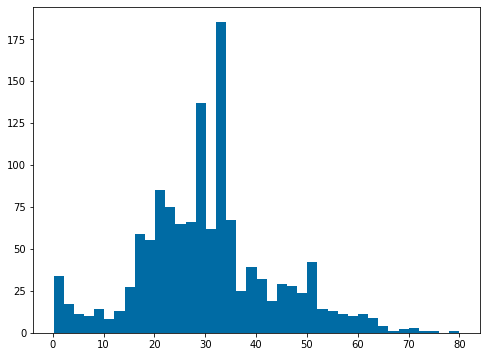

In [26]:
# Histogram with values replacement
plt.hist(df_eda.age, bins = 40);

The function assigns most of the ages between 20 and 30 years, the average age of the passengers (see boxplot).

### fare

We have only one missing fare value. It will be quite easy to replace it!

In [27]:
df_eda.loc[df_eda['fare'].isnull()]

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
1225,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,?,S,0


We don't know the fare paid by Mr. Thomas Storey but we know that he's a man, 60 years old (approx) and was in passenger class 3. We find people with similar characteristics and we calculate the average price these people paid for the trip.

In [28]:
# Find all the passengers of class 3, males and age > 60 years
mr_storey = df_eda.loc[(df_eda['pclass'] == 3) & (df_eda['sex'] == 'male') & (df_eda['age'] >= 60)]
mr_storey

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
727,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,?,Q,0
782,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,?,Q,0
1068,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,?,S,0
1225,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,?,S,0
1235,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,?,S,0


In [29]:
avg_price_cl3 = round(mr_storey['fare'].mean(),2)
avg_price_cl3 

7.38

We replace the null value with the calculated mean.

In [30]:
df_eda.loc[df_eda['fare'].isnull(),'fare'] = round(mr_storey['fare'].mean(),2)

In [31]:
# df_eda.iloc[1225]

### Check for missing values

In [32]:
df_eda.isnull().sum()

pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
survived    0
dtype: int64

No missing values!


## Unknown data

Check out unknown values.

In [33]:
unknown_values = df_eda[df_eda == '?'].count().sort_values(ascending=False)
# unknown_values

In [34]:
perc_unknown_values = round(unknown_values*100/df_eda.shape[0],2).sort_values(ascending=False)

In [35]:
uk_data = pd.concat([unknown_values, perc_unknown_values], axis=1, keys=['Total', '%'])
uk_data.head(5)

,Total,%
cabin,1014,77.46
embarked,2,0.15
pclass,0,0.00
name,0,0.00
sex,0,0.00


The only two columns with unknown data are cabin and embarked.

### cabin

The column with the cabin's code has a lot of missing values (>70%) but since it could be useful predictor, we decide not to drop it.

In fact, letters in cabin's code of a ship refer to the deck.

In [36]:
df_eda.cabin.unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', '?', 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

We extract the first letter from the cabin's code and we assign it to a deck, creating a new column.

In [37]:
deck = [i[:1]for i in df_eda.cabin]

df_eda['deck'] = deck
df_eda

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,deck
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1,B
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1,C
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,C
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0,C
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,?,C,0,?
1305,3,"Zabour, Miss. Thamine",female,30.0000,1,0,2665,14.4542,?,C,0,?
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,?,C,0,?
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,?,C,0,?


We suppose that the classes are from A to G. We consider T and ? as unkown values.

In [38]:
# df.cabin = code

# Replace 'T' with '?'
df_eda['deck'] = df_eda['deck'].str.replace('T', '?')
df_eda.head(2)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,deck
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1,B
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1,C


In [39]:
x = df_eda.groupby(['pclass','deck'])['deck'].size()
x

pclass  deck
1       ?        68
        A        22
        B        65
        C        94
        D        40
        E        34
2       ?       254
        D         6
        E         4
        F        13
3       ?       693
        E         3
        F         8
        G         5
Name: deck, dtype: int64

Visualization of the distribution of the decks per class.

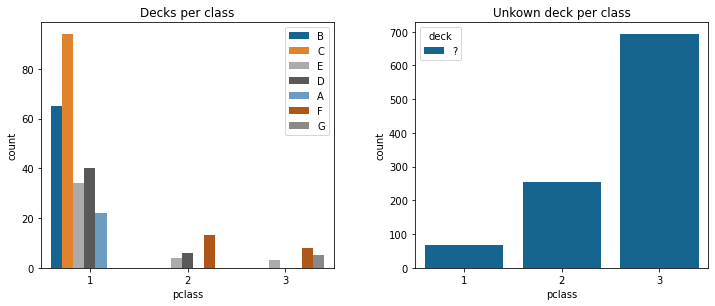

In [40]:

fig,ax = plt.subplots(1,2,figsize = (10,4))
plt.tight_layout(w_pad = 5)
ax = ax.ravel()

sns.countplot(x = 'pclass',data = df_eda[df_eda['deck'] != '?'], hue='deck', ax = ax[0])
ax[0].legend(loc = 'best')
ax[0].set_title('Decks per class');

sns.countplot(x = 'pclass', data=df_eda[df_eda['deck'] == '?'], hue='deck', ax = ax[1])
ax[1].set_title('Unkown deck per class');

In [41]:
# df_eda.groupby(['pclass','cabin'])['cabin'].count().unstack().plot(kind = 'bar', cmap= 'Blues');

In [42]:
decks_by_class = [[],[],[]]

for i in range(len(df_eda['pclass'].unique())):
    decks_by_class[i] = list(df_eda[df_eda['pclass'] == i+1]['deck'].unique())
    print(f'Class {i+1} cabins:', decks_by_class[i])

Class 1 cabins: ['B', 'C', 'E', 'D', 'A', '?']
Class 2 cabins: ['?', 'D', 'F', 'E']
Class 3 cabins: ['?', 'F', 'E', 'G']


In [43]:
# Removing null ('?') entries and single 'T' cabin
for i in range(len(decks_by_class)):
    if '?' in decks_by_class[i]:
        decks_by_class[i].remove('?')

decks_by_class

[['B', 'C', 'E', 'D', 'A'], ['D', 'F', 'E'], ['F', 'E', 'G']]

Let's assign weights to the cabins so we can select randomly from each list and the selections will be properly distributed.

In [44]:
weights_by_class = [[],[],[]]
elements_by_class = [[],[],[]]

for i, deck_list in enumerate(decks_by_class):
    for deck in deck_list:
        deck_tot = df_eda[(df_eda['deck'] != '?') & (df_eda['pclass'] == i+1)].count()[0]

        deck_known = df_eda[(df_eda['deck'] == deck) & (df_eda['pclass'] == i+1)].count()[0]

        weights_by_class[i].append(deck_known/deck_tot)
        elements_by_class[i].append(deck_known)
        
    print(f'Class {i+1} weights:', np.round(weights_by_class[i],3))
    print(f'Class {i+1} elements:', np.round(elements_by_class[i],3), '\n')

Class 1 weights: [0.255 0.369 0.133 0.157 0.086]
Class 1 elements: [65 94 34 40 22] 

Class 2 weights: [0.261 0.565 0.174]
Class 2 elements: [ 6 13  4] 

Class 3 weights: [0.5   0.188 0.312]
Class 3 elements: [8 3 5] 



In [45]:
# df_eda.deck.unique()

We impute the remaining cabin values semi-randomly as it is hard to sdetermine in which cabin each passenger was based on statistics.

In [46]:
# len(df_eda.ticket.unique())

We also make sure that families are housed in the same deck by analyzing their Ticket. 

In [47]:
# Store tickets that were already looped with cabin position
ticket_dict = {}

In [48]:
def define_deck(row):
    ticket = row['ticket']
    deck = row['deck']
    pclass = row['pclass']
    
    if (deck == '?') and (ticket not in ticket_dict):
        
        if pclass == 1:
            deck = list(np.random.choice(decks_by_class[0],size=1,
                                         p=weights_by_class[0]))[0]
        elif pclass ==2:
            deck = list(np.random.choice(decks_by_class[1],size=1,
                                         p=weights_by_class[1]))[0]
        elif pclass ==3:
            deck = list(np.random.choice(decks_by_class[2],size=1,
                                         p=weights_by_class[2]))[0]
        
        ticket_dict[ticket] = deck
        
    elif (deck == '?') and (ticket in ticket_dict):
        deck = ticket_dict[ticket]
    
    return deck

In [49]:
df_eda['deck'] = df_eda.apply(define_deck,axis=1)

### embarked

There are only two unknown values.

https://en.wikipedia.org/wiki/Passengers_of_the_Titanic can help us to find out when they embarked.

In [50]:
df_eda['embarked'].unique()

array(['S', 'C', '?', 'Q'], dtype=object)

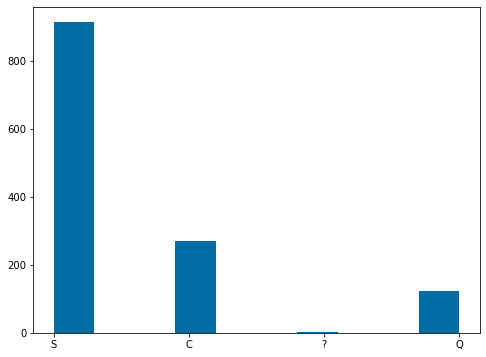

In [51]:
plt.hist(df_eda.embarked);

In [52]:
df_eda.loc[df['embarked'] == '?']

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,deck
168,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,?,1,B
284,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,?,1,B


Both women (Miss Amelie Icard - Mrs. Martha Evelyn) embarked in Southampton.

In [53]:
df_eda.embarked = df.embarked.replace('?','S')

In [54]:
df_eda['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

## Visualization

First of all, we visualize the percentage of survivors of the shipwreck.

### survived (target)

In [55]:
survivors = df_eda.survived.value_counts(normalize=True) * 100

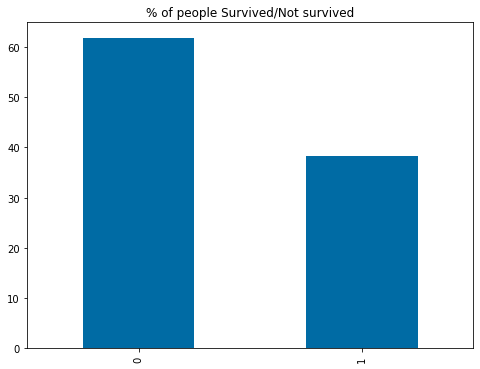

In [56]:
survivors.plot.bar().set_title('% of people Survived/Not survived');

In [57]:
print(f'The comparison revealed that more than {round(survivors[0],2)} % of the passengers had died.')

The comparison revealed that more than 61.8 % of the passengers had died.


For time limits, we decide to create some visualizations of the features we think are more interesting to know the passengers's possibility of survivance: 

    - sex
    - pclass
    - deck

In [58]:
df_eda.survived.unique()

array([1, 0], dtype=int64)

### sex

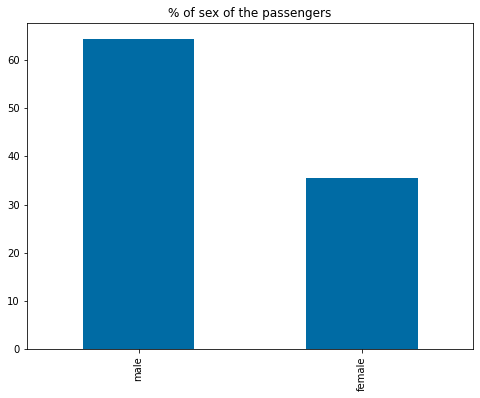

In [59]:
sex = df_eda.sex.value_counts(normalize = True) * 100

# Plot
sex.plot.bar().set_title('% of sex of the passengers');

In [60]:
print(f'Around {round(survivors[0],2)} % of the passengers were male while the remaining {round(survivors[1],2)} % were female.') 

Around 61.8 % of the passengers were male while the remaining 38.2 % were female.


### pclass

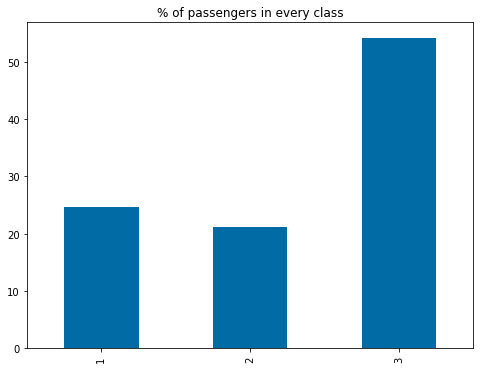

In [61]:
pclass = df_eda.pclass.value_counts(normalize = True) * 100

# Plot
pclass.sort_index().plot.bar().set_title('% of passengers in every class');

In [62]:
print(f'Passengers per class:\n - 1st class: {round(pclass[1],2)} %\n - 2nd class: {round(pclass[2],2)} %\n - 3rd class: {round(pclass[3],2)} %') 

Passengers per class:
 - 1st class: 24.68 %
 - 2nd class: 21.16 %
 - 3rd class: 54.16 %


### deck

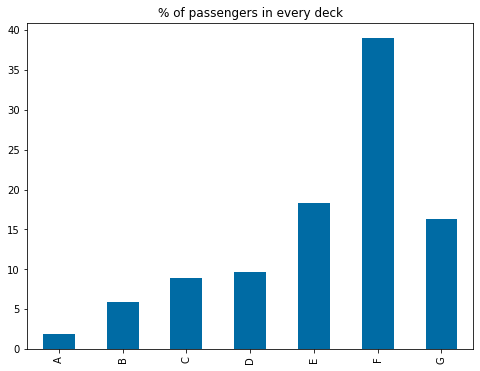

In [63]:
deck = df_eda.deck.value_counts(normalize = True).sort_index() * 100

# Plot
deck.sort_index().plot.bar().set_title('% of passengers in every deck');

In [64]:
print(f'Passengers per deck:\n - Deck A: {round(deck[0],2)} %\n - Deck B: {round(deck[1],2)} %\n - Deck C: {round(deck[2],2)} %\n - Deck D: {round(deck[3],2)} %\n - Deck E: {round(deck[4],2)} %\n - Deck F: {round(deck[5],2)} %\n - Deck G: {round(deck[6],2)} %') 

Passengers per deck:
 - Deck A: 1.91 %
 - Deck B: 5.96 %
 - Deck C: 8.86 %
 - Deck D: 9.7 %
 - Deck E: 18.26 %
 - Deck F: 38.96 %
 - Deck G: 16.35 %


### survivors per sex

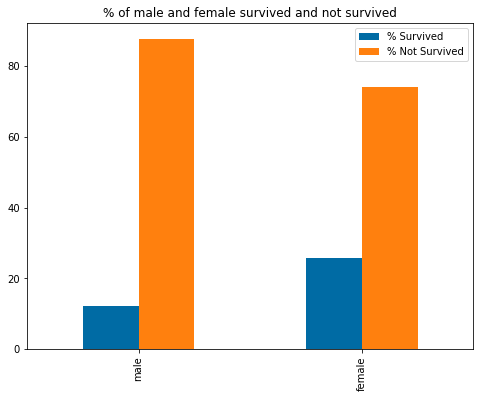

In [65]:
male_perc = round((df_eda[df_eda.sex == 'male'].survived == 1).value_counts()[1]/len(df_eda.sex) * 100, 2)
female_perc = round((df_eda[df_eda.sex == 'female'].survived == 1).value_counts()[1]/len(df_eda.sex) * 100, 2)


sex_perc_df = pd.DataFrame({ "% Survived":{"male": male_perc,"female": female_perc},  
                            "% Not Survived":{"male": 100 - male_perc,"female": 100 - female_perc}});

# Plot
sex_perc_df.plot.bar().set_title('% of male and female survived and not survived');

In [66]:
sex_perc_df

,% Survived,% Not Survived
male,12.3,87.7
female,25.9,74.1


In [67]:
print(f'More than 80% male passengers died as compared to around 70% female passengers.')

More than 80% male passengers died as compared to around 70% female passengers.


### survivors per class

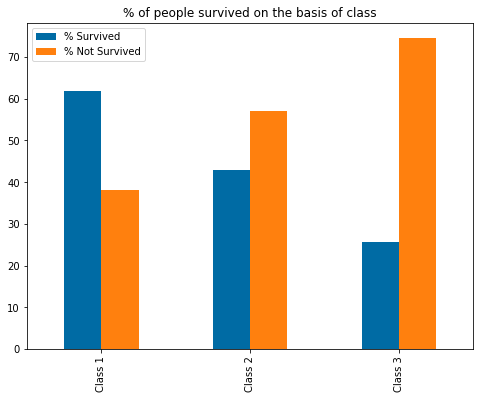

In [68]:
pclass_1_surv_distr = round((df_eda[df_eda.pclass == 1].survived == 1).value_counts()[1]/len(df_eda[df_eda.pclass == 1]) * 100, 2)
pclass_2_surv_distr = round((df_eda[df_eda.pclass == 2].survived == 1).value_counts()[1]/len(df_eda[df_eda.pclass == 2]) * 100, 2)
pclass_3_surv_distr = round((df_eda[df_eda.pclass == 3].survived == 1).value_counts()[1]/len(df_eda[df_eda.pclass == 3]) * 100, 2)



pclass_perc_df = pd.DataFrame(
    { "% Survived":{"Class 1": pclass_1_surv_distr,"Class 2": pclass_2_surv_distr, "Class 3": pclass_3_surv_distr},  
    "% Not Survived":{"Class 1": 100-pclass_1_surv_distr,"Class 2": 100-pclass_2_surv_distr, "Class 3": 100-pclass_3_surv_distr}})

# Plot
pclass_perc_df.plot.bar().set_title("% of people survived on the basis of class");

In [69]:
pclass_perc_df

,% Survived,% Not Survived
Class 1,61.92,38.08
Class 2,42.96,57.04
Class 3,25.53,74.47


In [70]:
print(f'More than 70% passengers of class 3 died as compared to around 60% passengers of 1st class survived.')

More than 70% passengers of class 3 died as compared to around 60% passengers of 1st class survived.


## Save csv

In [71]:
# df_eda.to_csv('output/data_EDA.csv')

## Feature engineering

Since this is categorical problem the algorithms that will be used further on will benefit from the data being categorical. We need ato do some transformations.

In [72]:
df_eda.head(2)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,deck
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1,B
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1,C


In [73]:
# Create a copy of the dataframe
df_label = df_eda.copy()

## Creating categories

### name

The titles of each passenger also provide useful information so we need to extract them.

In [74]:
def get_title(name):
    
    '''
    Function that finds the title of each passenger.
    '''
    
    # Format of title (upper letter+lowers letters + .
    title_search = re.search(' ([A-Za-z]+)\.', name)
    
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

We create a new column, title.

In [75]:
df_label['title'] = df_label['name'].apply(get_title)

df_label['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

We try to understand some of these lesser known titles:

- *Master*: boys and young men
- *Don/ Donna/ Lady/ Sir/ Countess/ Jonkheer*: royal or high profile title
- *Rev*: reverend, priest
- *Mme/ Ms*: woman of unknown marrital status (usually unmarried)
- *Major/ Col/ Capt*: military title
- *Mlle*: married woman

Now, we can do the replacement:

In [76]:
# Grouping titles
df_label['title'] = df_label['title'].replace(['Ms','Mme'],'Miss')
df_label['title'] = df_label['title'].replace(['Mme', 'Mlle'],'Mrs')
df_label['title'] = df_label['title'].replace(['Don','Dona','Lady','Sir','Countess','Jonkheer'],'Royal')
df_label['title'] = df_label['title'].replace(['Rev','Major','Col','Capt','Dr'],'Other')

In [77]:
df_label['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Other', 'Royal'], dtype=object)

In [78]:
# Labelling
df_label.loc[df_label["title"] == "Miss", "title"] = 0
df_label.loc[df_label["title"] == "Mr", "title"] = 1
df_label.loc[df_label["title"] == "Mrs", "title"] = 2
df_label.loc[df_label["title"] == "Master", "title"] = 3
df_label.loc[df_label["title"] == "Royal", "title"] = 4
df_label.loc[df_label["title"] == "Other", "title"] = 5

In [79]:
df_label['title'].unique()

array([0, 3, 1, 2, 5, 4], dtype=object)

### sex

In [80]:
# Labelling
df_label.loc[df_label["sex"] == "male" , "sex"] = 0
df_label.loc[df_label["sex"] == "female","sex"] = 1

In [81]:
df_label['sex'].unique()

array([1, 0], dtype=object)

### age

In [82]:
print(f'The youngest traveler onboard was aged around {str(round(df_label.age.min()*12))} months and the oldest passenger was {str(round(df_label.age.max()))} years. We need to discretized values')

The youngest traveler onboard was aged around 2 months and the oldest passenger was 80 years. We need to discretized values


In [83]:
# Discretize ages (ranges = 10 years)
df_label['age_range'] = pd.cut(df_label.age, [0, 10, 20, 30, 40, 50, 60, 70, 80], labels = False)

In [84]:
df_label.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,deck,title,age_range
0,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,1,B,0,2
1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,1,C,3,0
2,1,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,0,C,0,0
3,1,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,0,C,1,2
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,0,C,2,2


We visualize the probability of survivance based on range ages (0 = 0-10 years, 1 = 10-20 years... and so on).

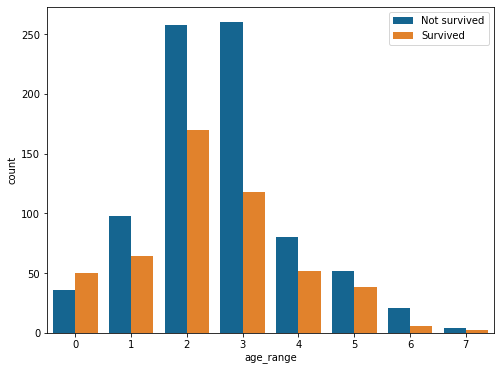

In [85]:
# Plot
sns.countplot(x = "age_range", hue = "survived", data = df_label).legend(labels = ["Not survived", "Survived"]);

A lot of people between 20 and 30 years old couldn't survive. Children below age 10 had a good chance to survive.

In [86]:
df_label['age_range'].unique()

array([2, 0, 4, 6, 3, 5, 7, 1], dtype=int64)

### fare

In [87]:
print(f'The cheapest ticket was free {str(round(df_label.fare.min()))} and the most expensive was {str(round(df_label.fare.max()))} dollars.')

The cheapest ticket was free 0 and the most expensive was 512 dollars.


We convert fare , which is currently continuous, to discrete data. We decide to split data into 5 groups.

In [88]:
splits = 5

In [89]:
# Intervals for discretizing fare values
for i in range(splits):
    print(f'Group {i+1}:',pd.qcut(df_label['fare'],splits).sort_values().unique()[i])

Group 1: (-0.001, 7.854]
Group 2: (7.854, 10.5]
Group 3: (10.5, 21.558]
Group 4: (21.558, 41.579]
Group 5: (41.579, 512.329]


In [90]:
df_label['fare_range'] = pd.qcut(df_label.fare, splits,labels=False)

Visualization of the fare range based on the pclass.

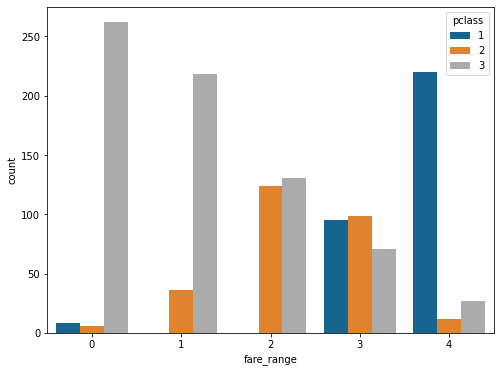

In [91]:
# Plot
sns.countplot(x = "fare_range", hue = "pclass", data = df_label);

In [92]:
# df_label.head()

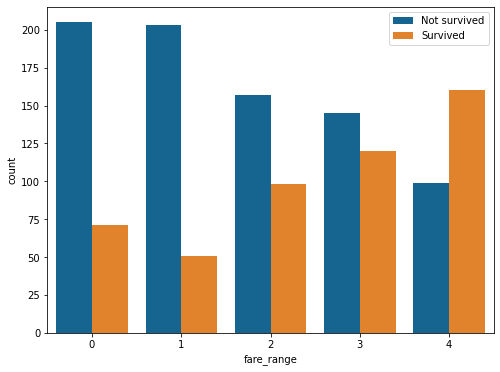

In [93]:
# Plot
sns.countplot(x = "fare_range", hue = "survived", data = df_label).legend(labels = ["Not survived", "Survived"]);

Survival probability increases with fare. People who have bought more expensive tickets are more likely to survive than to die.

In [94]:
df_label['fare_range'].unique()

array([4, 3, 0, 2, 1], dtype=int64)

### family size

We create a new column 'fam_size' adding 'SibSp' (number of siblings/spouse of a passenger) and 'patch' (number of parents and childrens). 

Comment in the box plots at the beginning.

In [95]:
df_label["fam_size"] = df_label["sibsp"] + df_label["parch"] + 1

In [96]:
df_label["fam_size"].unique()

array([ 1,  4,  2,  3,  6,  5,  7,  8, 11], dtype=int64)

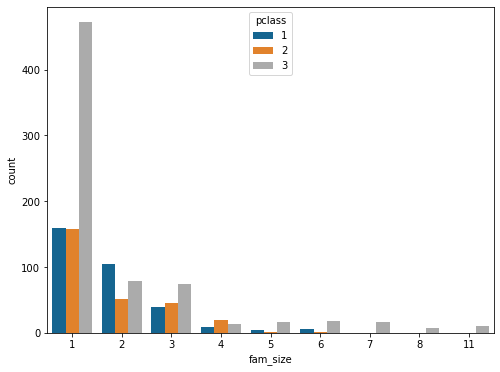

In [97]:
# Plot
sns.countplot(x = "fam_size", hue = "pclass", data = df_label);

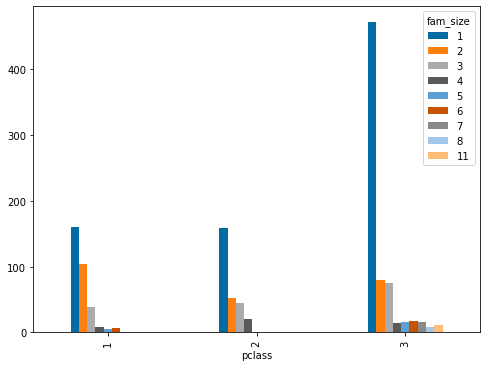

In [98]:
df_label.groupby(['pclass', 'fam_size'])['fare_range'].count().unstack().plot(kind = 'bar');

We can see that families with 7,8,11 people traveled in class 3. We decide to create a unique group of 7 people.

In [99]:
df_label.loc[df_label["fam_size"] == 8, "fam_size"] = 7
df_label.loc[df_label["fam_size"] == 11, "fam_size"] = 7

In [100]:
df_label.fam_size.unique()

array([1, 4, 2, 3, 6, 5, 7], dtype=int64)

### deck

In [101]:
df_label.loc[df_label["deck"] == "A", "deck"] = 0
df_label.loc[df_label["deck"] == "B", "deck"] = 1
df_label.loc[df_label["deck"] == "C", "deck"] = 2
df_label.loc[df_label["deck"] == "D", "deck"] = 3
df_label.loc[df_label["deck"] == "E", "deck"] = 4
df_label.loc[df_label["deck"] == "F", "deck"] = 5
df_label.loc[df_label["deck"] == "G", "deck"] = 6

In [102]:
df_label['deck'].unique()

array([1, 2, 4, 3, 0, 5, 6], dtype=object)

### embarked

In [103]:
df_label.loc[df_label["embarked"] == "S", "embarked"] = 0
df_label.loc[df_label["embarked"] == "C", "embarked"] = 1
df_label.loc[df_label["embarked"] == "Q", "embarked"] = 2

In [104]:
df_label['embarked'].unique()

array([0, 1, 2], dtype=object)

### Check tranformations

In [105]:
df_label.head(3)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,deck,title,age_range,fare_range,fam_size
0,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,0,1,1,0,2,4,1
1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,0,1,2,3,0,4,4
2,1,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,0,0,2,0,0,4,4


In [106]:
print(f'The transformed dataset has {df_label.shape[0]} examples and {df_label.shape[1]-1} features + the target variable (survived)')

The transformed dataset has 1309 examples and 15 features + the target variable (survived)


### Remove useless variables

We drop some original columns to avoid the features being too correlated with new ones:

In [107]:
df_label.drop(['name', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin'], axis=1, inplace=True)

In [108]:
print(f'The final dataset has {df_label.shape[0]} examples and {df_label.shape[1]-1} features + the target variable (survived)')

The final dataset has 1309 examples and 8 features + the target variable (survived)


## Correlation

Check for correlation and collinearity.

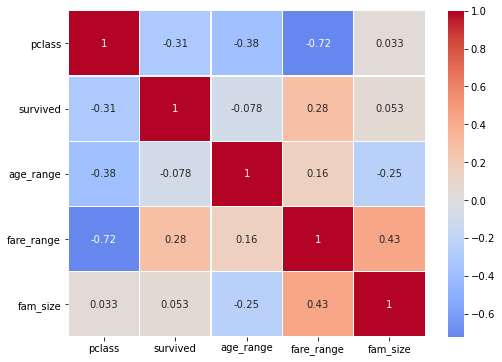

In [109]:
# Check correlation & check if we have collinearity
plt.subplots(figsize=(8,6))

sns.heatmap(df_label[df_label.columns].corr(), linewidths = 0.2, cmap = 'coolwarm', center = 0, annot = True)
plt.yticks(rotation = 0);

### Conclusions

No big collinearity... the features we choose to use for the model seem quite good.

- Negative correlation between survived and pclass (lower the class, higher the chance to survive)
- Negative correlation between fare_range and class with pclass (lower the class, higher the rate and age)

## Normalization

In [110]:
df_label.describe()

,pclass,survived,age_range,fare_range,fam_size
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,2.546982,1.982429,1.844156
std,0.837836,0.486055,1.358055,1.425681,1.399598
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,2.000000,1.000000,1.000000
50%,3.000000,0.000000,2.000000,2.000000,1.000000
75%,3.000000,1.000000,3.000000,3.000000,2.000000
max,3.000000,1.000000,7.000000,4.000000,7.000000


As we can see in the statistics table, all the features have the same order of magnitude (except for the family-size that is bigger). We think is not necessary to normalize data.

## Save csv

In [111]:
# df_label.to_csv('output/data_label.csv')